In [5]:
# Tokenization
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer
from nltk.tokenize.casual import TweetTokenizer as CasualTweetTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from functools import reduce
from collections import Counter
# general 
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
import numpy as np

In [30]:
pd.set_option('display.max_colwidth',None)

In [2]:
with open(r'c:\Users\jaromir\OneDrive\UoM\100_Disertation\02_SrcData\02_StockTwits\stocktwits1.json') as f:
  stocktwits = json.load(f)

In [3]:
def process_twits(json_file):
    df = pd.DataFrame(columns=['ticker','text','sentiment'])
    text = []
    sentiment = []
    tickers = []
    
    for ticker in stocktwits.keys():
        for idx in range(len(stocktwits[ticker])-1):
            text.append(stocktwits[ticker][idx]['body'])
            sentiment.append(stocktwits[ticker][idx]['entities']['sentiment'])
            tickers.append(ticker)
            
    df['ticker'] = tickers
    df['text'] = text
    df['sentiment'] = sentiment
    
    return df

In [9]:
dfs = process_twits(stocktwits)
dfs

,ticker,text,sentiment
0,AAPL,$AAPL Possible H&amp;S setting up on the 6mo.,{'basic': 'Bearish'}
1,AAPL,$ADMP I am wondering why I could not hold to $T or $AAPL for a year and have all stupidty to keep adding more sh*t of ADMP for more than a year,None
2,AAPL,$SPOT $AAPL $SPY Spotify Near Term PT $235,{'basic': 'Bearish'}
3,AAPL,$WKHS before I forget here’s the address and info if anyone wants to report to sec also $AMZN $AAPL $GOOGL,{'basic': 'Bearish'}
4,AAPL,A simple way for newbie traders to manage risk better:\n\nSet a max dollar amount you are willing to lose on every trade\n\nIf you have 10 shares of $AAPL at 363\n\nand the max you want to lose is $100\n\nif it drops to 353 you get out \n\nno questions\nno emotion\n\nthen on the the next,None
...,...,...,...
1155,YHOO,$YHOO Why doesn’t Yahoo adjust for splits on their stock charts any more?,None
1156,YHOO,$YHOO Anyone know why this isn’t on webull?,None
1157,YHOO,$AAPL $YHOO $AMZN $BUD \n💥CVSI💥 top performing cannabis stock today. Look at the 180 day chart. Looks to me volume is building up. 🥦CVSI🥦 Cannabis stocks will pump pre-election,None
1158,YHOO,"$INO I don’t see much of a ceiling on the leading Covid-19 vaccine developers ($INO, $MRNA) until a vaccine is developed. There is one first prize - everyone doesn’t get a trophy... In the meantime valuation gets thrown out the window. As a very early $AMZN and $YHOO investor this seems no different. GL.",{'basic': 'Bullish'}


### Filter unwanted words/strings

In [32]:
# remove urls
url_filter = re.compile(r"www.[\w\d]+.\w+|http://\S+|https://\S+")

# remove hashtags
hashtag_filter = re.compile(r"#\w+")

# remove mentions
mentions_filter = re.compile(r"@\w+")

# remove special characters
schar_filter = re.compile(r"[+?!,;.(){}-]")

# remove new-lines
nline_filter = re.compile(r"\n")

In [25]:
def filter_results(document, filter_condition):
    """replace given regEx string with a space"""
    document = re.sub(filter_condition, "", document)
    return document

In [27]:
def filter_documents(df, filters):
    df.loc[:,'filtered_text'] = df.loc[:,'text']
    for char_filter in filters:       
        df.loc[:,'filtered_text'] = df.loc[:,'filtered_text'].apply(filter_results, args=[char_filter])
    return df

In [33]:
filters = [url_filter, hashtag_filter, mentions_filter, schar_filter, nline_filter]

In [34]:
dfs = filter_documents(dfs, filters)

In [35]:
dfs[['text','filtered_text']]

,text,filtered_text
0,$AAPL Possible H&amp;S setting up on the 6mo.,$AAPL Possible H&ampS setting up on the 6mo
1,$ADMP I am wondering why I could not hold to $T or $AAPL for a year and have all stupidty to keep adding more sh*t of ADMP for more than a year,$ADMP I am wondering why I could not hold to $T or $AAPL for a year and have all stupidty to keep adding more sh*t of ADMP for more than a year
2,$SPOT $AAPL $SPY Spotify Near Term PT $235,$SPOT $AAPL $SPY Spotify Near Term PT $235
3,$WKHS before I forget here’s the address and info if anyone wants to report to sec also $AMZN $AAPL $GOOGL,$WKHS before I forget here’s the address and info if anyone wants to report to sec also $AMZN $AAPL $GOOGL
4,A simple way for newbie traders to manage risk better:\n\nSet a max dollar amount you are willing to lose on every trade\n\nIf you have 10 shares of $AAPL at 363\n\nand the max you want to lose is $100\n\nif it drops to 353 you get out \n\nno questions\nno emotion\n\nthen on the the next,A simple way for newbie traders to manage risk better:Set a max dollar amount you are willing to lose on every tradeIf you have 10 shares of $AAPL at 363and the max you want to lose is $100if it drops to 353 you get out no questionsno emotionthen on the the next
...,...,...
1155,$YHOO Why doesn’t Yahoo adjust for splits on their stock charts any more?,$YHOO Why doesn’t Yahoo adjust for splits on their stock charts any more
1156,$YHOO Anyone know why this isn’t on webull?,$YHOO Anyone know why this isn’t on webull
1157,$AAPL $YHOO $AMZN $BUD \n💥CVSI💥 top performing cannabis stock today. Look at the 180 day chart. Looks to me volume is building up. 🥦CVSI🥦 Cannabis stocks will pump pre-election,$AAPL $YHOO $AMZN $BUD 💥CVSI💥 top performing cannabis stock today Look at the 180 day chart Looks to me volume is building up 🥦CVSI🥦 Cannabis stocks will pump preelection
1158,"$INO I don’t see much of a ceiling on the leading Covid-19 vaccine developers ($INO, $MRNA) until a vaccine is developed. There is one first prize - everyone doesn’t get a trophy... In the meantime valuation gets thrown out the window. As a very early $AMZN and $YHOO investor this seems no different. GL.",$INO I don’t see much of a ceiling on the leading Covid19 vaccine developers $INO $MRNA until a vaccine is developed There is one first prize everyone doesn’t get a trophy In the meantime valuation gets thrown out the window As a very early $AMZN and $YHOO investor this seems no different GL


In [36]:
# Word Tokenization
dfs.loc[:,'Word_Token'] = dfs.filtered_text.apply(lambda x: TweetTokenizer().tokenize(x))

In [37]:
# Turn everything lower case
def lower_list(list_of_word):
    """ turn all strings into lower case"""
    low_list = [word.lower() for word in list_of_word]
    return low_list

In [38]:
dfs.loc[:,'Word_Token'] = dfs.loc[:,'Word_Token'].apply(lower_list)

In [39]:
# Get rid of stop words
def remove_stopwords(list_of_word):
    """ removes stopwords """
    no_stopwords = [t for t in list_of_word if t not in stopwords.words('english')]
    return no_stopwords

In [40]:
dfs.loc[:,'Word_Token_NS'] = dfs.loc[:,'Word_Token'].apply(remove_stopwords)

In [42]:
dfs[['text','Word_Token_NS']]

,text,Word_Token_NS
0,$AAPL Possible H&amp;S setting up on the 6mo.,"[$, aapl, possible, h, &, amps, setting, 6mo]"
1,$ADMP I am wondering why I could not hold to $T or $AAPL for a year and have all stupidty to keep adding more sh*t of ADMP for more than a year,"[$, admp, wondering, could, hold, $, $, aapl, year, stupidty, keep, adding, sh, *, admp, year]"
2,$SPOT $AAPL $SPY Spotify Near Term PT $235,"[$, spot, $, aapl, $, spy, spotify, near, term, pt, $, 235]"
3,$WKHS before I forget here’s the address and info if anyone wants to report to sec also $AMZN $AAPL $GOOGL,"[$, wkhs, forget, ’, address, info, anyone, wants, report, sec, also, $, amzn, $, aapl, $, googl]"
4,A simple way for newbie traders to manage risk better:\n\nSet a max dollar amount you are willing to lose on every trade\n\nIf you have 10 shares of $AAPL at 363\n\nand the max you want to lose is $100\n\nif it drops to 353 you get out \n\nno questions\nno emotion\n\nthen on the the next,"[simple, way, newbie, traders, manage, risk, better, :, set, max, dollar, amount, willing, lose, every, tradeif, 10, shares, $, aapl, 363and, max, want, lose, $, 100if, drops, 353, get, questionsno, emotionthen, next]"
...,...,...
1155,$YHOO Why doesn’t Yahoo adjust for splits on their stock charts any more?,"[$, yhoo, ’, yahoo, adjust, splits, stock, charts]"
1156,$YHOO Anyone know why this isn’t on webull?,"[$, yhoo, anyone, know, ’, webull]"
1157,$AAPL $YHOO $AMZN $BUD \n💥CVSI💥 top performing cannabis stock today. Look at the 180 day chart. Looks to me volume is building up. 🥦CVSI🥦 Cannabis stocks will pump pre-election,"[$, aapl, $, yhoo, $, amzn, $, bud, 💥, cvsi, 💥, top, performing, cannabis, stock, today, look, 180, day, chart, looks, volume, building, 🥦, cvsi, 🥦, cannabis, stocks, pump, preelection]"
1158,"$INO I don’t see much of a ceiling on the leading Covid-19 vaccine developers ($INO, $MRNA) until a vaccine is developed. There is one first prize - everyone doesn’t get a trophy... In the meantime valuation gets thrown out the window. As a very early $AMZN and $YHOO investor this seems no different. GL.","[$, ino, ’, see, much, ceiling, leading, covid, 19, vaccine, developers, $, ino, $, mrna, vaccine, developed, one, first, prize, everyone, ’, get, trophy, meantime, valuation, gets, thrown, window, early, $, amzn, $, yhoo, investor, seems, different, gl]"


In [43]:
# Lemmatize all tokens into a new list: lemmatized
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize_words(list_of_words):
    lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in list_of_words]
    return lemmatized

In [44]:
dfs.loc[:,'Word_Token_NS_L'] = dfs.loc[:,'Word_Token_NS'].apply(lemmatize_words)
dfs[['text','Word_Token_NS_L']]

,text,Word_Token_NS_L
0,$AAPL Possible H&amp;S setting up on the 6mo.,"[$, aapl, possible, h, &, amp, setting, 6mo]"
1,$ADMP I am wondering why I could not hold to $T or $AAPL for a year and have all stupidty to keep adding more sh*t of ADMP for more than a year,"[$, admp, wondering, could, hold, $, $, aapl, year, stupidty, keep, adding, sh, *, admp, year]"
2,$SPOT $AAPL $SPY Spotify Near Term PT $235,"[$, spot, $, aapl, $, spy, spotify, near, term, pt, $, 235]"
3,$WKHS before I forget here’s the address and info if anyone wants to report to sec also $AMZN $AAPL $GOOGL,"[$, wkhs, forget, ’, address, info, anyone, want, report, sec, also, $, amzn, $, aapl, $, googl]"
4,A simple way for newbie traders to manage risk better:\n\nSet a max dollar amount you are willing to lose on every trade\n\nIf you have 10 shares of $AAPL at 363\n\nand the max you want to lose is $100\n\nif it drops to 353 you get out \n\nno questions\nno emotion\n\nthen on the the next,"[simple, way, newbie, trader, manage, risk, better, :, set, max, dollar, amount, willing, lose, every, tradeif, 10, share, $, aapl, 363and, max, want, lose, $, 100if, drop, 353, get, questionsno, emotionthen, next]"
...,...,...
1155,$YHOO Why doesn’t Yahoo adjust for splits on their stock charts any more?,"[$, yhoo, ’, yahoo, adjust, split, stock, chart]"
1156,$YHOO Anyone know why this isn’t on webull?,"[$, yhoo, anyone, know, ’, webull]"
1157,$AAPL $YHOO $AMZN $BUD \n💥CVSI💥 top performing cannabis stock today. Look at the 180 day chart. Looks to me volume is building up. 🥦CVSI🥦 Cannabis stocks will pump pre-election,"[$, aapl, $, yhoo, $, amzn, $, bud, 💥, cvsi, 💥, top, performing, cannabis, stock, today, look, 180, day, chart, look, volume, building, 🥦, cvsi, 🥦, cannabis, stock, pump, preelection]"
1158,"$INO I don’t see much of a ceiling on the leading Covid-19 vaccine developers ($INO, $MRNA) until a vaccine is developed. There is one first prize - everyone doesn’t get a trophy... In the meantime valuation gets thrown out the window. As a very early $AMZN and $YHOO investor this seems no different. GL.","[$, ino, ’, see, much, ceiling, leading, covid, 19, vaccine, developer, $, ino, $, mrna, vaccine, developed, one, first, prize, everyone, ’, get, trophy, meantime, valuation, get, thrown, window, early, $, amzn, $, yhoo, investor, seems, different, gl]"


In [45]:
def concat_lists(x1, x2): return x1 + x2

In [62]:
def full_bow(df,attribute):
    bow_list = reduce(concat_lists, df[attribute])
    bow = FreqDist(bow_list)
    return bow   

In [47]:
def create_bow(df,attribute):
    bow_dict = {}
    for ticker in df.ticker.unique():
        ticker_words = reduce(concat_lists, df[df.ticker == ticker][attribute])
        bow = Counter(ticker_words)
        bow_dict[ticker] = bow
    return bow_dict

In [63]:
bow = full_bow(dfs,'Word_Token_NS_L')

In [65]:
bow.most_common(30)

[('$', 2340),
 (':', 348),
 ('&', 320),
 ('|', 174),
 ('%', 162),
 ('’', 139),
 ('stock', 139),
 ('new', 92),
 ('fb', 86),
 ('today', 81),
 ('buy', 68),
 ('news', 62),
 ('ba', 62),
 ('article', 59),
 ('see', 58),
 ('aapl', 57),
 ('market', 57),
 ('daily', 57),
 ('price', 56),
 ('msft', 54),
 ('u', 53),
 ('call', 53),
 ('get', 52),
 ('/', 52),
 ('company', 51),
 ('xom', 51),
 ('option', 50),
 ('v', 50),
 ('2020', 50),
 ('…', 49)]

In [52]:
def create_fdist(df, attribute, tick):
    ticker_words = reduce(concat_lists, df[df.ticker == tick][attribute])
    fdist = FreqDist(ticker_words)
    return fdist

In [55]:
AAPL_fdist = create_fdist(dfs,'Word_Token_NS_L','AAPL')

In [56]:
AAPL_fdist

FreqDist({'$': 61, 'aapl': 29, '&': 10, '’': 9, 'want': 6, 'amzn': 6, 'stock': 6, 'year': 5, 'cdc': 5, 'spy': 4, ...})

c:\Users\jaromir\Anaconda3\envs\disProject\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\jaromir\Anaconda3\envs\disProject\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 56496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\jaromir\Anaconda3\envs\disProject\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Users\jaromir\Anaconda3\envs\disProject\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 56496 missing from current font.
  font.set_text(s, 0, flags=flags)


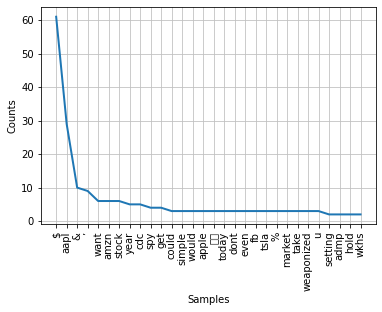

In [58]:
AAPL_fdist.plot(30,cumulative=False)
plt.show()

In [ ]:
# add 2 and 3-grams